In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline
from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re

In [45]:
#symbols = pd.read_csv('comment_folder/sp500.csv')
#symbols = sp500.values.tolist()
#symbols['Symbol'] = symbols['Symbol'].str[0:4]
#symbols = sp500.values.tolist()
symbols = ["MMM","AOS","ABT","ABBV","ABMD","ACN","ATVI","ADM","ADBE","AAP","AMD","AES","AFL","APD","AKAM","ALK","ALB","ARE","ALGN","ALLE","LNT","ALL","GOOGL","GOOG",
           "MO","AMZN","AMCR","AEE","AAL","AEP","AXP","AIG","AMT","AWK","AMP","ABC","AME","AMGN","APH","ADI","ANSS","ANTM","AON","APA","AAPL","AMAT","APTV","ANET","AJG",
           "AIZ","ATO","ADSK","ADP","AZO","AVB","AVY","BKR","BLL","BAC","BBWI","BAX","BDX","BRK.B","BBY","BIO","BIIB","BLK","BK","BA","BKNG","BWA","BXP","BSX","BMY",
           "AVGO","BR","BF.B","CHRW","COG","CDNS","CZR","CPB","COF","CAH","KMX","CCL","CARR","CTLT","CAT","CBOE","CBRE","CDW","CE","CNC","CNP","CERN","CF","CRL","SCHW",
           "CHTR","CVX","CMG","CB","CHD","CI","CINF","CTAS","CSCO","CFG","CTXS","CLX","CME","CMS","KO","CTSH","CL","CMCSA","CMA","CAG","COP","ED","STZ","CPRT","GLW",
           "CTVA","COST","CCI","CSX","CMI","CVS","DHI","DHR","DRI","DVA","DE","DAL","XRAY","DVN","DXCM","FANG","DLR","DFS","DISCA","DISCK","DISH","DG","DLTR","DPZ",
           "DOV","DOW","DTE","DUK","DRE","DD","DXC","EMN","ETN","EBAY","ECL","EIX","EW","LLY","EMR","ENPH","ETR","EOG","EFX","EQIX","EQR","ESS","EL","ETSY","RE","EVRG",
           "ES","EXC","EXPE","EXPD","EXR","XOM","FFIV","FB","FAST","FRT","FDX","FIS","FITB","FRC","FE","FISV","FLT","FMC","FTNT","FTV","FBHS","FOXA","FOX","BEN","FCX",
           "GPS","GRMN","IT","GNRC","GD","GE","GIS","GM","GPC","GILD","GPN","GL","GS","HAL","HBI","HAS","HCA","PEAK","HSIC","HES","HPE","HLT","HOLX","HD","HON","HRL","HST",
           "HWM","HPQ","HUM","HBAN","HII","IBM","IEX","IDXX","INFO","ITW","ILMN","INCY","IR","INTC","ICE","IFF","IP","IPG","INTU","ISRG","IVZ","IPGP","IQV","IRM","JBHT",
           "JKHY","SJM","JNJ","JCI","JPM","JNPR","KSU","KEY","KEYS","KMB","KIM","KMI","KLAC","KHC","KR","LHX","LH","LRCX","LW","LVS","LEG","LDOS","LEN","LNC","LIN",
           "LYV","LKQ","LMT","LOW","LUMN","LYB","MTB","MRO","MPC","MKTX","MAR","MMC","MLM","MAS","MA","MXIM","MKC","MCD","MCK","MDT","MRK","MET","MTD","MGM","MCHP",
           "MU","MSFT","MAA","MRNA","MHK","TAP","MDLZ","MPWR","MNST","MCO","MS","MSI","MSCI","NDAQ","NTAP","NFLX","NWL","NEM","NWSA","NWS","NEE","NLSN","NK","NI","NSC",
           "NTRS","NOC","NLOK","NCLH","NOV","NRG","NUE","NVDA","NVR","NXPI","ORLY","OXY","ODFL","OMC","OKE","ORCL","OGN","OTIS","PCAR","PKG","PH","PAYX","PAYC","PYPL",
           "PENN","PNR","PBCT","PEP","PKI","PRGO","PFE","PM","PSX","PNW","PXD","PNC","POOL","PPG","PPL","PFG","PG","PGR","PLD","PRU","PTC","PEG","PSA","PHM","PVH","QRVO",
           "QCOM","PWR","DGX","RL","RJF","RTX","REG","REGN","RF","RSG","RMD","RHI","ROK","ROL","ROP","ROST","RCL","SPGI","CRM","SBAC","SLB","STX","SEE","SRE","NOW",
           "SHW","SPG","SWKS","SNA","SO","LUV","SWK","SBUX","STT","STE","SYK","SIVB","SYF","SNPS","SYY","TMUS","TROW","TTWO","TPR","TGT","TEL","TDY","TFX","TER","TSLA",
           "TXN","TXT","COO","HIG","HSY","MOS","TRV","DIS","TMO","TJX","TSCO","TT","TDG","TRMB","TFC","TWTR","TYL","TSN","USB","UDR","ULTA","UAA","UA","UNP","UAL","UPS",
           "URI","UNH","UHS","UNM","VLO","VTR","VRSN","VRSK","VZ","VRTX","VFC","VIAC","VTRS","VNO","VMC","WRB","GWW","WAB","WBA","WMT","WM","WAT","WEC","WFC","WELL",
           "WST","WDC","WU","WRK","WY","WHR","WMB","WLTW","WYNN","XEL","XLNX","XYL","YUM","ZBRA","ZBH","ZION","ZTS"]

In [46]:
df = pd.read_csv('comment_folder/all_comments.csv')
df.head()

,Unnamed: 0,Author,Comment,Score,timestamp
0,249,KarlMarx693,Is Jpow the most memed financial official ever?,13,6/16/2021 5:06
1,193,pr3dato8,Is it too late to get into $JPOW?,14,6/16/2021 5:07
2,404,dragonrider85,"Gentlemen, it is with great pleasure to inform...",36,6/16/2021 5:09
3,403,MLKKO,Whos still holding BB?,152,6/16/2021 5:11
4,127,None,Last week I went to go outside for a smoke and...,98,6/16/2021 5:15


In [47]:
search_list = symbols

df['symbols'] = df.Comment.str.extract('({0})'.format('|'.join(search_list)))
result = df[~pd.isna(df.symbols)]

result

,Unnamed: 0,Author,Comment,Score,timestamp,symbols
11,20,UpperSpinach,STOP FUCKING ASKING\n\nJPOW SPEAKS AT 07:30 HI...,84,6/16/2021 5:48,PEAK
16,10,RADIO02118,"Remember when TSLA would go up 10% a week, eve...",51,6/16/2021 6:06,TSLA
18,311,Life_Whereas_3789,Watching CLF and ARVL print.\n\n\nSENS head an...,12,6/16/2021 6:11,CL
23,246,ktrash,Yellen going to steal the mic at FOMC today an...,43,6/16/2021 6:30,OMC
31,315,culturalmeathead,MY $CLF FOMO is so strong after $39 PT by JP M...,12,6/16/2021 7:03,CL
...,...,...,...,...,...,...
28404,101,prisonsexx,PFE calls saving my portfolio,13,8/17/2021 14:17,PFE
28408,224,johndalysbeergut,SPY CEO just said that he's transforming the c...,10,8/17/2021 14:23,CE
28409,224,johndalysbeergut,SPY CEO just said that he's transforming the c...,10,8/17/2021 14:23,CE
28421,323,MrCFA,Every time Im green its because Im a fucking g...,9,8/17/2021 14:52,IT


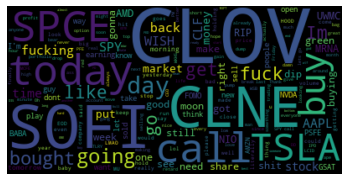

In [48]:
# Create stopword list:
stopwords = set(stopwords.words('english'))
textt = " ".join(comment for comment in result.Comment)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


In [49]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
result = result[result['Score'] != 10]
result['sentiment'] = result['Score'].apply(lambda rating : +1 if rating > 10 else -1)



<ipython-input-49-f15584d9753f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
dfNew = result[['Comment','sentiment']]
dfNew.head()


,Comment,sentiment
11,STOP FUCKING ASKING\n\nJPOW SPEAKS AT 07:30 HI...,1
16,"Remember when TSLA would go up 10% a week, eve...",1
18,Watching CLF and ARVL print.\n\n\nSENS head an...,1
23,Yellen going to steal the mic at FOMC today an...,1
31,MY $CLF FOMO is so strong after $39 PT by JP M...,1


In [51]:
# random split train and test data
index = result.index
dfNew['random_number'] = np.random.randn(len(index))
train = dfNew[dfNew['random_number'] <= 0.8]
test = dfNew[dfNew['random_number'] > 0.8]

<ipython-input-51-4955e1c5388e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Comment'])
test_matrix = vectorizer.transform(test['Comment'])

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [55]:
lr.fit(X_train,y_train)


LogisticRegression()

In [56]:
predictions = lr.predict(X_test)

In [57]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)


array([[275, 144],
       [196, 626]], dtype=int64)

In [58]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.58      0.66      0.62       419
           1       0.81      0.76      0.79       822

    accuracy                           0.73      1241
   macro avg       0.70      0.71      0.70      1241
weighted avg       0.74      0.73      0.73      1241

